<a href="https://colab.research.google.com/github/PrabakaranAero/ML_Self/blob/master/Linear_Regression_Praba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression - From scratch **

Ref : https://youtu.be/1C3olrs1CUw   (Least square criterion )


In [0]:
import matplotlib.pyplot as plt
import numpy as np
#Data 
height=np.array([65,65,62,67,69,65,61,67])
weight=np.array([105,125,110,120,140,135,95,130])
#print(height.size)
#plt.scatter(height,weight)
#plt.show()

**Least Square creteria:**

The linear line we draw should have least possible (minimum) distance to all data points.

Let us now draw an arbitrary line in space that passes through some of these data points. The equation of this straight line would be Y = mX + b where m is the slope and b is its intercept on the Y-axis.


![alt text](https://miro.medium.com/max/1313/1*ZEIXhLHr99IK7qVSZJlyJg.png)



y =mx+c is replaced by the following equation (Just focus on the concept)

![alt text](https://1.bp.blogspot.com/-wenmTJF2VJU/XXiphTj2-fI/AAAAAAAACh8/aHtgRNUyYTQyD9sQgNqJF-VHUsXz6SXngCLcBGAsYHQ/s1600/Capture.JPG)


Finding y-intercept(c) in equation y=mx+c

***Here c is mentioned as b0

![alt text](https://1.bp.blogspot.com/-cO9lezmLNdI/XXiuTX8FZZI/AAAAAAAACiI/qfRS2_KjHYkU9qpzZHOkPEB6C4Obx6e_ACLcBGAsYHQ/s1600/Capture_1.JPG)


In [0]:
# Finding the slope of the line

# Ref : https://youtu.be/5g8y-XNi2kI ,https://youtu.be/1C3olrs1CUw

def LeastSquare_Calculate():
  if weight.ndim==1 and height.ndim==1:   # Checking whether given data is 1 dimensional array
    numerator_1=sum(height*weight)
    numerator_2=(sum(height)*sum(weight)/np.size(weight))
    #print(numerator_2)
    denominator_1=sum(height**2)
    denominator_2=(sum(height)**2/np.size(weight))
    slope_m=((numerator_1-numerator_2)/(denominator_1-denominator_2))
    #print(slope_m)

    #y intercept 
    y_inter_c=(sum(weight)-(slope_m*sum(height)))/np.size(weight)
    #print(y_inter_c)
    print('The equation of Line is : y={1}+{0}X'.format(round(slope_m,2),round(y_inter_c,2)))
    return([round(slope_m,2),round(y_inter_c,2)])
  

The equation of Line is : y=-186.47+4.71X


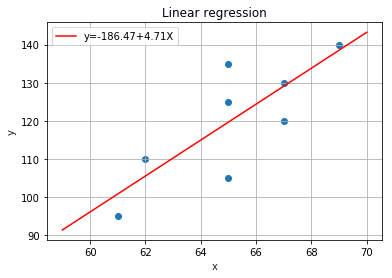

In [53]:
#Drawing a straighrt line in matplotlib 
x=np.linspace(59,70,200)
result_1=LeastSquare_Calculate()
slope_line=result_1[0]
y_intercept_line=result_1[1]
y=(result_1[1]+(result_1[0]*x))

plt.scatter(height,weight)   # Input data 

plt.plot(x, y, '-r', label='y={1}+{0}X'.format(round(slope_m,2),round(y_inter_c,2)))
plt.title('Linear regression',color='#030216')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

The model we trained is not universal :  

The equation of Line is : y=-186.47+4.71X 

weight is zero for the height  = 39.59 Which is obsolete

The applicability of the trained model relies purely on data we use to train . It will predict the weight with high accuracy in the 60-70 weight range.


Given a known set of inputs and their corresponding outputs, A machine learning model tries to make some predictions for a new set of inputs.

![alt text](https://miro.medium.com/max/701/1*FevGteEfXxQ6nUFiqgSN4A.png)

The Error would be the difference between the two predictions.

![alt text](https://miro.medium.com/max/369/1*nhIFZVB6yB-JcuaA3Ld1cg.png)

A Cost Function/Loss Function evaluates the performance of our Machine Learning Algorithm. 
The Loss function computes the error for a single training example while the Cost function is the average of the loss functions for all the training examples.

![alt text](https://miro.medium.com/max/311/1*y0ME9Nfr962OLad60mpfiw.png)

If you note in the above equation ,we squared the difference 

Reason is ,, 
The squared differences make it easier to derive a regression line. Indeed, to find that line we need to compute the first derivative of the Cost function, and it is much harder to compute the derivative of absolute values than squared values. Also, the squared differences increase the error distance, thus, making the bad predictions more pronounced than the good ones.


In [60]:
# Cost function 
#print(y_intercept_line)
Y_pred=np.array([(y_intercept_line+(slope_m*i)) for i in height])
#print(Y_pred)
Y_actual=weight
print(Y_pred-Y_actual)
cost_func=sum((Y_pred-Y_actual)**2)/Y_pred.size
print(cost_func)

[ 14.41235294  -5.58764706  -4.70529412   8.82411765  -1.76411765
 -15.58764706   5.58882353  -1.17588235]
77.20588269896201


**The goal of any Machine Learning Algorithm is to minimize the Cost Function.**

This is because a lower error between the actual and the predicted values signifies that the algorithm has done a good job in learning. Since we want the lowest error value, we want those‘slope  m’ and ‘Y intercept b’ values which give the smallest possible error.

